In [1]:
import matplotlib.pyplot as plt
import math
import datetime as dt
import numpy as np
import copy
import seaborn as sns
from pandas.plotting import scatter_matrix
import pandas as pd
from scipy.stats import ttest_rel

In [2]:
xls = pd.ExcelFile('data.xlsx')

In [3]:
ind = pd.read_excel(xls, 'industrialisation')
ind.shape

(2840, 30)

In [4]:
co2 = pd.read_excel(xls, 'Co2')
co2.head()
co2.shape

(20853, 4)

In [5]:
gl = pd.read_excel(xls, 'GlobalLandTemperaturesByCity')
gl.shape

(1048575, 7)

In [6]:
gl.isna().sum()

dt                                   0
AverageTemperature               47547
AverageTemperatureUncertainty    47547
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [7]:
gl.iloc[798583]['dt']

datetime.datetime(1900, 7, 1, 0, 0)

In [8]:
gl = gl.dropna()

In [9]:
gl.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [10]:
gl = gl.reset_index()

In [11]:
del gl['index']

In [12]:
gl.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,3.624,Ã…rhus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,1.283,Ã…rhus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,1.347,Ã…rhus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,1.396,Ã…rhus,Denmark,57.05N,10.33E


In [13]:
gl['dt'] = pd.to_datetime(gl['dt'])

In [14]:
gl = gl[gl['dt'] > pd.Timestamp(year = 1989, month = 12, day = 31)]
gl.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2882,1990-01-01,4.267,0.459,Ã…rhus,Denmark,57.05N,10.33E
2883,1990-02-01,5.895,0.460,Ã…rhus,Denmark,57.05N,10.33E
2884,1990-03-01,6.565,0.299,Ã…rhus,Denmark,57.05N,10.33E
2885,1990-04-01,8.068,0.222,Ã…rhus,Denmark,57.05N,10.33E
2886,1990-05-01,12.944,0.287,Ã…rhus,Denmark,57.05N,10.33E


In [15]:
gl = gl.reset_index(drop = True)
gl['dt'] = gl['dt'].dt.year

In [16]:
gl

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1990,4.267,0.459,Ã…rhus,Denmark,57.05N,10.33E
1,1990,5.895,0.460,Ã…rhus,Denmark,57.05N,10.33E
2,1990,6.565,0.299,Ã…rhus,Denmark,57.05N,10.33E
3,1990,8.068,0.222,Ã…rhus,Denmark,57.05N,10.33E
4,1990,12.944,0.287,Ã…rhus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
119874,2013,27.745,0.241,Bontang,Indonesia,0.80N,118.13E
119875,2013,27.795,0.258,Bontang,Indonesia,0.80N,118.13E
119876,2013,28.220,0.292,Bontang,Indonesia,0.80N,118.13E
119877,2013,27.127,0.231,Bontang,Indonesia,0.80N,118.13E


In [17]:
countries = ['India', 'China', 'United States', 'United Kingdom', 'Japan', 'Germany']

country = gl[gl['Country'].isin(countries)]

In [18]:
country

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1136,1990,-13.093,0.522,ÃœrÃ¼mqi,China,44.20N,87.20E
1137,1990,-10.704,0.399,ÃœrÃ¼mqi,China,44.20N,87.20E
1138,1990,-0.075,0.469,ÃœrÃ¼mqi,China,44.20N,87.20E
1139,1990,9.557,0.249,ÃœrÃ¼mqi,China,44.20N,87.20E
1140,1990,17.972,0.285,ÃœrÃ¼mqi,China,44.20N,87.20E
...,...,...,...,...,...,...,...
119590,2013,8.374,0.199,Bonn,Germany,50.63N,6.34E
119591,2013,11.463,0.235,Bonn,Germany,50.63N,6.34E
119592,2013,15.589,0.247,Bonn,Germany,50.63N,6.34E
119593,2013,19.869,0.280,Bonn,Germany,50.63N,6.34E


In [19]:
grouped = country.groupby(['dt','Country']).mean()

In [20]:
grouped

AverageTemperature  AverageTemperatureUncertainty
dt   Country                                                          
1990 China                    10.930208                       0.331760
     Germany                   9.785250                       0.289024
     India                    26.033152                       0.395594
     Japan                    14.147424                       0.269750
     United Kingdom           10.101881                       0.279119
...                                 ...                            ...
2013 Germany                   9.141339                       0.279643
     India                    27.179701                       0.512657
     Japan                    13.804729                       0.450458
     United Kingdom            9.156000                       0.434500
     United States            14.929293                       0.387619

[144 rows x 2 columns]

In [21]:
temp = grouped.reset_index()
temp

,dt,Country,AverageTemperature,AverageTemperatureUncertainty
0,1990,China,10.930208,0.331760
1,1990,Germany,9.785250,0.289024
2,1990,India,26.033152,0.395594
3,1990,Japan,14.147424,0.269750
4,1990,United Kingdom,10.101881,0.279119
...,...,...,...,...
139,2013,Germany,9.141339,0.279643
140,2013,India,27.179701,0.512657
141,2013,Japan,13.804729,0.450458
142,2013,United Kingdom,9.156000,0.434500


In [22]:
india_temp = temp[temp['Country'] == 'India']
germany_temp = temp[temp['Country'] == 'Germany']
china_temp = temp[temp['Country'] == 'China']
usa_temp = temp[temp['Country'] == 'United States']
japan_temp = temp[temp['Country']== 'Japan']
uk_temp = temp[temp['Country'] == 'United Kingdom']

In [23]:
co2 = co2[co2['Entity'].isin(countries)]
co2 = co2[co2['Year'] > 1989]
co2 = co2[co2['Year'] < 2014]
co2 = co2.reset_index(drop = True)

In [24]:
co2_g = co2.groupby(['Year','Entity']).mean()
co2_g

Annual CO2 emissions (tonnes )
Year Entity                                        
1990 China                             2.420302e+09
     Germany                           1.012902e+09
     India                             6.165791e+08
     Japan                             1.155263e+09
     United Kingdom                    6.010676e+08
...                                             ...
2013 Germany                           8.326430e+08
     India                             1.997879e+09
     Japan                             1.314070e+09
     United Kingdom                    4.777326e+08
     United States                     5.519613e+09

[144 rows x 1 columns]

In [25]:
india_co2 = co2[co2['Entity'] == 'India']
uk_co2 = co2[co2['Entity'] == 'United Kingdom']
usa_co2 = co2[co2['Entity'] == 'United States']
japan_co2 = co2[co2['Entity'] == 'Japan']
china_co2 = co2[co2['Entity'] == 'China']
germany_co2 = co2[co2['Entity'] == 'Germany']

dates = [i for i in range(1990,2014)]

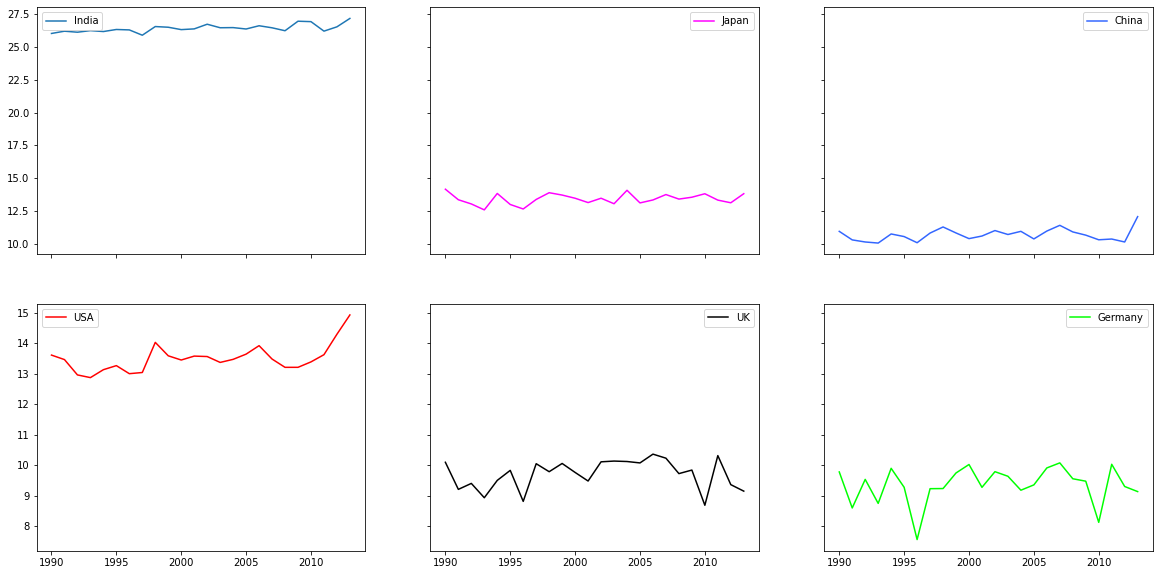

In [26]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10), sharex='col', sharey='row')

ax[0, 0].plot(dates, india_temp['AverageTemperature'], label='India')
ax[0, 0].legend()

ax[0, 1].plot(dates, japan_temp['AverageTemperature'], label='Japan', c='#ff00ff')
ax[0, 1].legend()

ax[0, 2].plot(dates, china_temp['AverageTemperature'], label='China', c='#3366ff')
ax[0, 2].legend()

ax[1, 0].plot(dates, usa_temp['AverageTemperature'], label='USA', c='red')
ax[1, 0].legend()

ax[1, 1].plot(dates, uk_temp['AverageTemperature'], label='UK', c='black')
ax[1, 1].legend()

ax[1, 2].plot(dates, germany_temp['AverageTemperature'], label='Germany', c='#00ff00')
ax[1, 2].legend()

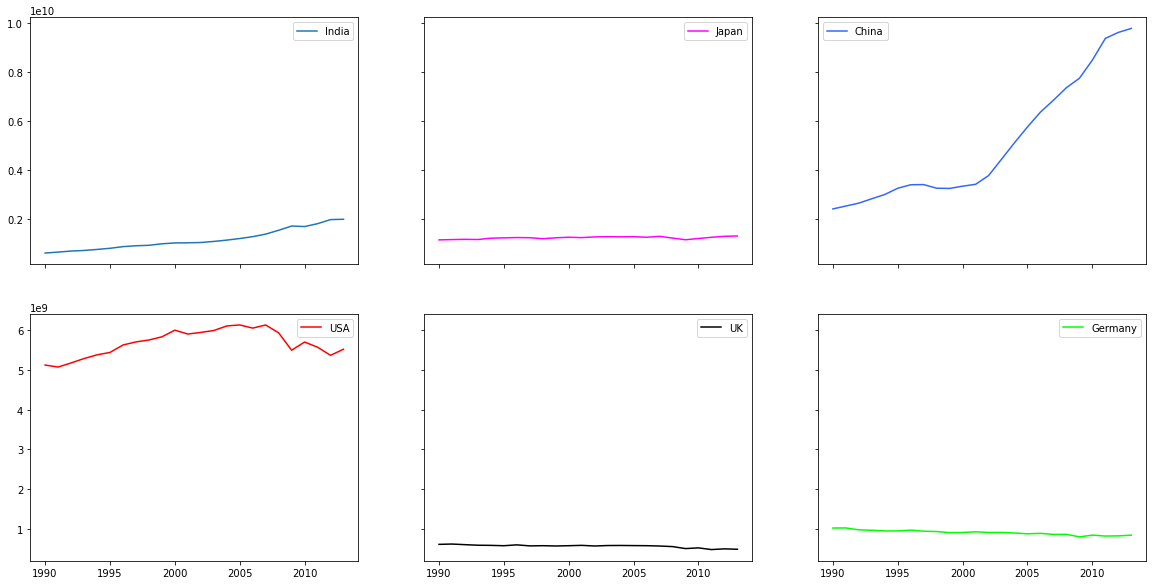

In [27]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10), sharex='col', sharey='row')

ax[0, 0].plot(dates, india_co2['Annual CO2 emissions (tonnes )'], label='India')
ax[0, 0].legend()

ax[0, 1].plot(dates, japan_co2['Annual CO2 emissions (tonnes )'], label='Japan', c='#ff00ff')
ax[0, 1].legend()

ax[0, 2].plot(dates, china_co2['Annual CO2 emissions (tonnes )'], label='China', c='#3366ff')
ax[0, 2].legend()

ax[1, 0].plot(dates, usa_co2['Annual CO2 emissions (tonnes )'], label='USA', c='red')
ax[1, 0].legend()

ax[1, 1].plot(dates, uk_co2['Annual CO2 emissions (tonnes )'], label='UK', c='black')
ax[1, 1].legend()

ax[1, 2].plot(dates, germany_co2['Annual CO2 emissions (tonnes )'], label='Germany', c='#00ff00')
ax[1, 2].legend()

In [28]:
india_temp_co2 = pd.concat([india_temp,india_co2['Annual CO2 emissions (tonnes )']], axis=1, keys=['india_temp', 'india_co2'])

In [29]:
india_temp_co2.corr()

india_temp                     \
                                                  dt AverageTemperature   
india_temp dt                               1.000000           0.662429   
           AverageTemperature               0.662429           1.000000   
           AverageTemperatureUncertainty    0.482627           0.445901   
india_co2  Annual CO2 emissions (tonnes )   0.970226          -0.718352   

                                                                         \
                                          AverageTemperatureUncertainty   
india_temp dt                                                  0.482627   
           AverageTemperature                                  0.445901   
           AverageTemperatureUncertainty                       1.000000   
india_co2  Annual CO2 emissions (tonnes )                      0.940128   

                                                               india_co2  
                                          Annual CO2 emissions (tonnes )  
india_temp dt                                                   0.970226  
           AverageTemperature                                  -0.718352  
           AverageTemperatureUncertainty                        0.940128  
india_co2  Annual CO2 emissions (tonnes )                       1.000000

In [30]:
india_temp_co2_p = ttest_rel(india_temp['AverageTemperature'].to_list(), india_co2['Annual CO2 emissions (tonnes )'])
japan_temp_co2_p = ttest_rel(japan_temp['AverageTemperature'].to_list(), japan_co2['Annual CO2 emissions (tonnes )'])
uk_temp_co2_p = ttest_rel(uk_temp['AverageTemperature'].to_list(), uk_co2['Annual CO2 emissions (tonnes )'])
usa_temp_co2_p = ttest_rel(usa_temp['AverageTemperature'].to_list(), usa_co2['Annual CO2 emissions (tonnes )'])
china_temp_co2_p = ttest_rel(china_temp['AverageTemperature'].to_list(), china_co2['Annual CO2 emissions (tonnes )'])
germany_temp_co2_p = ttest_rel(germany_temp['AverageTemperature'].to_list(), germany_co2['Annual CO2 emissions (tonnes )'])
#temp increases with co2 emission

In [31]:
india_temp_co2_p
countries_temp_co2_p = dict()
countries_temp_co2_p['india'] = india_temp_co2_p
countries_temp_co2_p['china'] = china_temp_co2_p
countries_temp_co2_p['germany'] = germany_temp_co2_p
countries_temp_co2_p['uk'] = uk_temp_co2_p
countries_temp_co2_p['usa'] = usa_temp_co2_p
countries_temp_co2_p['japan'] = japan_temp_co2_p
countries_temp_co2_p = pd.DataFrame.from_dict(countries_temp_co2_p)
countries_temp_co2_p.rename({1:'p-value', 0:'statistic'})

# we can see all the countries have small p values (<0.05) for correlation with co2 emissions by tonne annually and 
# average temperature in their respective countries,
# thus, we can reject a null hypothesis that there is no correlation whatsoever between co2 emission and average temperature in 
# a country and say there is a very high certainty (>99%) 
# that there is a positive correlation between co2 emission and temperature

,india,china,germany,uk,usa,japan
statistic,-1.347553e+01,-9.959753e+00,-7.261559e+01,-7.080272e+01,-8.339233e+01,-1.276769e+02
p-value,2.112403e-12,8.248580e-10,1.126348e-28,2.009698e-28,4.726019e-30,2.684616e-34


In [32]:
countries_co2_dt_p = dict()
india_co2_dt_p = ttest_rel(india_co2['Annual CO2 emissions (tonnes )'],india_co2['Year'])
china_co2_dt_p = ttest_rel(china_co2['Annual CO2 emissions (tonnes )'],china_co2['Year'])
germany_co2_dt_p = ttest_rel(germany_co2['Annual CO2 emissions (tonnes )'],germany_co2['Year'])
japan_co2_dt_p = ttest_rel(japan_co2['Annual CO2 emissions (tonnes )'],japan_co2['Year'])
usa_co2_dt_p = ttest_rel(usa_co2['Annual CO2 emissions (tonnes )'],usa_co2['Year'])
uk_co2_dt_p = ttest_rel(uk_co2['Annual CO2 emissions (tonnes )'],uk_co2['Year'])

countries_co2_dt_p['india'] = india_co2_dt_p
countries_co2_dt_p['japan'] = japan_co2_dt_p
countries_co2_dt_p['germany'] = germany_co2_dt_p
countries_co2_dt_p['china'] = china_co2_dt_p
countries_co2_dt_p['uk'] = uk_co2_dt_p
countries_co2_dt_p['usa'] = usa_co2_dt_p
countries_co2_dt_p = pd.DataFrame.from_dict(countries_co2_dt_p).rename({0:'statistic',1:'p-value'})
countries_co2_dt_p

# again we see below that all the countries have very low p value and we can say with high certainty that there is a positive 
# correlation between co2 emissions and time

,india,japan,germany,china,uk,usa
statistic,1.347551e+01,1.276767e+02,7.261542e+01,9.959749e+00,7.080245e+01,8.339230e+01
p-value,2.112476e-12,2.684709e-34,1.126408e-28,8.248641e-10,2.009870e-28,4.726055e-30


In [33]:
india_co2_dt_p

Ttest_relResult(statistic=13.475511664048003, pvalue=2.112475585363433e-12)

In [34]:
del ind['Country ISO3']
del ind['Indicator Id']
ind.head()

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,Competitive Industrial Performance Score,Value,0.005707,0.005429,0.004259,0.003535,0.002747,0.002525,0.002703,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
1,Afghanistan,Competitive Industrial Performance Rank,Rank,122.000000,122.000000,127.000000,131.000000,133.000000,135.000000,136.000000,...,130.000000,132.000000,133.000000,131.000000,137.000000,136.000000,138.000000,139.000000,138.000000,138.000000
2,Afghanistan,Competitive Industrial Performance Quintile,Value,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,Afghanistan,Impact of a country on World Manufactures Trade,Value,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
4,Afghanistan,Share in world manufacturing exports index,Value,0.000094,0.000094,0.000100,0.000106,0.000109,0.000116,0.000114,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037


In [35]:
ind[ind['Subindicator Type'] == 'Rank']

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Afghanistan,Competitive Industrial Performance Rank,Rank,122.0,122.0,127.0,131.0,133.0,135.0,136.0,...,130.0,132.0,133.0,131.0,137.0,136.0,138.0,139.0,138.0,138.0
21,Albania,Competitive Industrial Performance Rank,Rank,115.0,119.0,123.0,124.0,124.0,124.0,125.0,...,124.0,122.0,107.0,119.0,106.0,106.0,103.0,101.0,106.0,117.0
41,United Arab Emirates,Competitive Industrial Performance Rank,Rank,81.0,80.0,77.0,71.0,70.0,70.0,67.0,...,46.0,40.0,49.0,44.0,46.0,54.0,53.0,49.0,44.0,41.0
61,Argentina,Competitive Industrial Performance Rank,Rank,45.0,45.0,43.0,40.0,39.0,39.0,41.0,...,43.0,41.0,40.0,39.0,39.0,39.0,39.0,41.0,40.0,45.0
81,Armenia,Competitive Industrial Performance Rank,Rank,88.0,88.0,108.0,107.0,107.0,107.0,108.0,...,98.0,104.0,106.0,108.0,112.0,109.0,110.0,104.0,101.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,"Venezuela, RB",Competitive Industrial Performance Rank,Rank,51.0,34.0,37.0,36.0,37.0,37.0,39.0,...,42.0,63.0,65.0,56.0,51.0,52.0,77.0,56.0,64.0,66.0
2761,Vietnam,Competitive Industrial Performance Rank,Rank,94.0,93.0,91.0,91.0,89.0,88.0,88.0,...,69.0,69.0,68.0,66.0,61.0,60.0,58.0,55.0,53.0,48.0
2781,"Yemen, Rep.",Competitive Industrial Performance Rank,Rank,135.0,134.0,135.0,135.0,135.0,136.0,131.0,...,126.0,127.0,124.0,124.0,125.0,124.0,126.0,127.0,125.0,130.0
2801,South Africa,Competitive Industrial Performance Rank,Rank,42.0,42.0,44.0,39.0,41.0,40.0,42.0,...,41.0,42.0,42.0,41.0,41.0,40.0,42.0,43.0,43.0,44.0


In [36]:
ind = ind[ind['Country Name'].isin(countries)]

In [37]:
ind

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
540,China,Competitive Industrial Performance Score,Value,0.088960,0.093291,0.100299,0.110058,0.123855,0.133536,0.136619,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
541,China,Competitive Industrial Performance Rank,Rank,32.000000,33.000000,31.000000,30.000000,27.000000,27.000000,25.000000,...,17.000000,16.000000,12.000000,9.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000
542,China,Competitive Industrial Performance Quintile,Value,0.700000,0.700000,0.700000,0.700000,0.900000,0.900000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
543,China,Impact of a country on World Manufactures Trade,Value,0.025118,0.025118,0.025118,0.028023,0.032752,0.034336,0.033401,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
544,China,Share in world manufacturing exports index,Value,0.170583,0.170583,0.181641,0.215762,0.258881,0.288280,0.276394,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,United States,Manufactured Exports per capita,Value,1200.451820,1292.108117,1357.289521,1390.028964,1534.043630,1709.605923,1796.294990,...,2321.691730,2657.235782,2920.815071,3178.236048,2292.570345,2770.181976,3137.032070,3225.220141,3231.862861,3269.323814
2736,United States,Manufactured Exports per capita index,Value,0.074705,0.080411,0.084469,0.086507,0.094642,0.092036,0.093353,...,0.082268,0.087489,0.081631,0.082869,0.076393,0.085108,0.083214,0.090452,0.080208,0.052594
2737,United States,Industrial export quality index,Value,0.848574,0.857247,0.857395,0.856469,0.861043,0.856583,0.861895,...,0.881568,0.878403,0.872286,0.859803,0.794639,0.781659,0.744058,0.748143,0.741225,0.708612
2738,United States,Manufactured Exports share in total exports,Value,0.815927,0.828391,0.829481,0.830081,0.843921,0.838594,0.836965,...,0.861052,0.860435,0.848114,0.833288,0.757616,0.770793,0.760074,0.757452,0.754638,0.753809


In [38]:
ind_v = ind[ind['Subindicator Type'] == 'Value']
ind_v

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
540,China,Competitive Industrial Performance Score,Value,0.088960,0.093291,0.100299,0.110058,0.123855,0.133536,0.136619,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
542,China,Competitive Industrial Performance Quintile,Value,0.700000,0.700000,0.700000,0.700000,0.900000,0.900000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
543,China,Impact of a country on World Manufactures Trade,Value,0.025118,0.025118,0.025118,0.028023,0.032752,0.034336,0.033401,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
544,China,Share in world manufacturing exports index,Value,0.170583,0.170583,0.181641,0.215762,0.258881,0.288280,0.276394,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
545,China,Impact of a country on World Manufacturing Val...,Value,0.033536,0.037863,0.045071,0.053268,0.059694,0.063942,0.069088,...,0.117472,0.126562,0.138968,0.153513,0.181587,0.186882,0.197423,0.210459,0.219102,0.229128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,United States,Manufactured Exports per capita,Value,1200.451820,1292.108117,1357.289521,1390.028964,1534.043630,1709.605923,1796.294990,...,2321.691730,2657.235782,2920.815071,3178.236048,2292.570345,2770.181976,3137.032070,3225.220141,3231.862861,3269.323814
2736,United States,Manufactured Exports per capita index,Value,0.074705,0.080411,0.084469,0.086507,0.094642,0.092036,0.093353,...,0.082268,0.087489,0.081631,0.082869,0.076393,0.085108,0.083214,0.090452,0.080208,0.052594
2737,United States,Industrial export quality index,Value,0.848574,0.857247,0.857395,0.856469,0.861043,0.856583,0.861895,...,0.881568,0.878403,0.872286,0.859803,0.794639,0.781659,0.744058,0.748143,0.741225,0.708612
2738,United States,Manufactured Exports share in total exports,Value,0.815927,0.828391,0.829481,0.830081,0.843921,0.838594,0.836965,...,0.861052,0.860435,0.848114,0.833288,0.757616,0.770793,0.760074,0.757452,0.754638,0.753809


In [39]:
del ind_v['Subindicator Type']

In [40]:
ind_v

,Country Name,Indicator,1990,1991,1992,1993,1994,1995,1996,1997,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
540,China,Competitive Industrial Performance Score,0.088960,0.093291,0.100299,0.110058,0.123855,0.133536,0.136619,0.146228,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
542,China,Competitive Industrial Performance Quintile,0.700000,0.700000,0.700000,0.700000,0.900000,0.900000,0.900000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
543,China,Impact of a country on World Manufactures Trade,0.025118,0.025118,0.025118,0.028023,0.032752,0.034336,0.033401,0.038720,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
544,China,Share in world manufacturing exports index,0.170583,0.170583,0.181641,0.215762,0.258881,0.288280,0.276394,0.296279,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
545,China,Impact of a country on World Manufacturing Val...,0.033536,0.037863,0.045071,0.053268,0.059694,0.063942,0.069088,0.072454,...,0.117472,0.126562,0.138968,0.153513,0.181587,0.186882,0.197423,0.210459,0.219102,0.229128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,United States,Manufactured Exports per capita,1200.451820,1292.108117,1357.289521,1390.028964,1534.043630,1709.605923,1796.294990,2010.252214,...,2321.691730,2657.235782,2920.815071,3178.236048,2292.570345,2770.181976,3137.032070,3225.220141,3231.862861,3269.323814
2736,United States,Manufactured Exports per capita index,0.074705,0.080411,0.084469,0.086507,0.094642,0.092036,0.093353,0.108913,...,0.082268,0.087489,0.081631,0.082869,0.076393,0.085108,0.083214,0.090452,0.080208,0.052594
2737,United States,Industrial export quality index,0.848574,0.857247,0.857395,0.856469,0.861043,0.856583,0.861895,0.879957,...,0.881568,0.878403,0.872286,0.859803,0.794639,0.781659,0.744058,0.748143,0.741225,0.708612
2738,United States,Manufactured Exports share in total exports,0.815927,0.828391,0.829481,0.830081,0.843921,0.838594,0.836965,0.858280,...,0.861052,0.860435,0.848114,0.833288,0.757616,0.770793,0.760074,0.757452,0.754638,0.753809


In [41]:
ind_v.to_csv('ind_v.csv') #writes to excel (easier to handle) #IGNORE LMAO

In [42]:
ind_n = ind_v.reset_index(drop=True)
ind_n = ind_n.groupby(['Country Name',]).mean()
ind_n = ind_n.reset_index()

In [43]:
ind_q = ind_n.transpose()
ind_q.rename(index = {'Country Name':'Year'})

,0,1,2,3,4,5
Year,China,Germany,India,Japan,United Kingdom,United States
1990,11.943,612.138,4.80356,470.861,347.295,287.861
1991,12.8793,623.506,4.59453,498.249,330.104,283.201
1992,14.5464,624.945,4.79295,499.563,337.792,288.237
1993,16.7081,551.849,5.05179,493.263,327.21,295.264
1994,19.9269,589.107,5.63492,500.361,360.903,316.734
1995,22.751,635.47,6.36043,532.54,391.656,338.585
1996,24.5677,625.156,6.7547,531.107,408.893,346.184
1997,27.4266,634.138,6.7698,543.493,430.167,367.799
1998,29.0399,659.054,6.72592,508.858,425.573,373.543


In [44]:
ind_q.columns = ['China','Germany','India','Japan','United Kingdom','United States']
ind_q

,China,Germany,India,Japan,United Kingdom,United States
Country Name,China,Germany,India,Japan,United Kingdom,United States
1990,11.943,612.138,4.80356,470.861,347.295,287.861
1991,12.8793,623.506,4.59453,498.249,330.104,283.201
1992,14.5464,624.945,4.79295,499.563,337.792,288.237
1993,16.7081,551.849,5.05179,493.263,327.21,295.264
1994,19.9269,589.107,5.63492,500.361,360.903,316.734
1995,22.751,635.47,6.36043,532.54,391.656,338.585
1996,24.5677,625.156,6.7547,531.107,408.893,346.184
1997,27.4266,634.138,6.7698,543.493,430.167,367.799
1998,29.0399,659.054,6.72592,508.858,425.573,373.543


In [45]:
ind = ind_q.drop(axis = 0, labels = 'Country Name')

In [46]:
ind

,China,Germany,India,Japan,United Kingdom,United States
1990,11.943,612.138,4.80356,470.861,347.295,287.861
1991,12.8793,623.506,4.59453,498.249,330.104,283.201
1992,14.5464,624.945,4.79295,499.563,337.792,288.237
1993,16.7081,551.849,5.05179,493.263,327.21,295.264
1994,19.9269,589.107,5.63492,500.361,360.903,316.734
1995,22.751,635.47,6.36043,532.54,391.656,338.585
1996,24.5677,625.156,6.7547,531.107,408.893,346.184
1997,27.4266,634.138,6.7698,543.493,430.167,367.799
1998,29.0399,659.054,6.72592,508.858,425.573,373.543
1999,31.2108,661.083,7.02657,520.601,420.292,389.766


In [47]:
ind['China'].to_list()

[11.943001542,
 12.879310492315788,
 14.546441754315786,
 16.708090837473684,
 19.926869297684213,
 22.75098066168421,
 24.56765617394737,
 27.42657540315789,
 29.039870416894743,
 31.210836377,
 35.62286094894737,
 38.28239956889473,
 43.22129407463158,
 51.865734073999995,
 60.64132617400001,
 70.40819954378946,
 83.90833926757892,
 100.78357884873684,
 114.38505306273684,
 111.75127310094737,
 133.8326704056316,
 152.08219066800004,
 164.18627262857893,
 175.19495665689473,
 186.1824659703684]

In [48]:
china_ind = ind['China'].to_list()
india_ind = ind['India'].to_list()
germany_ind = ind['Germany'].to_list()
uk_ind = ind['United Kingdom'].to_list()
usa_ind = ind['United States'].to_list()
japan_ind = ind['Japan'].to_list()

dates = [i for i in range(1990,2015)]

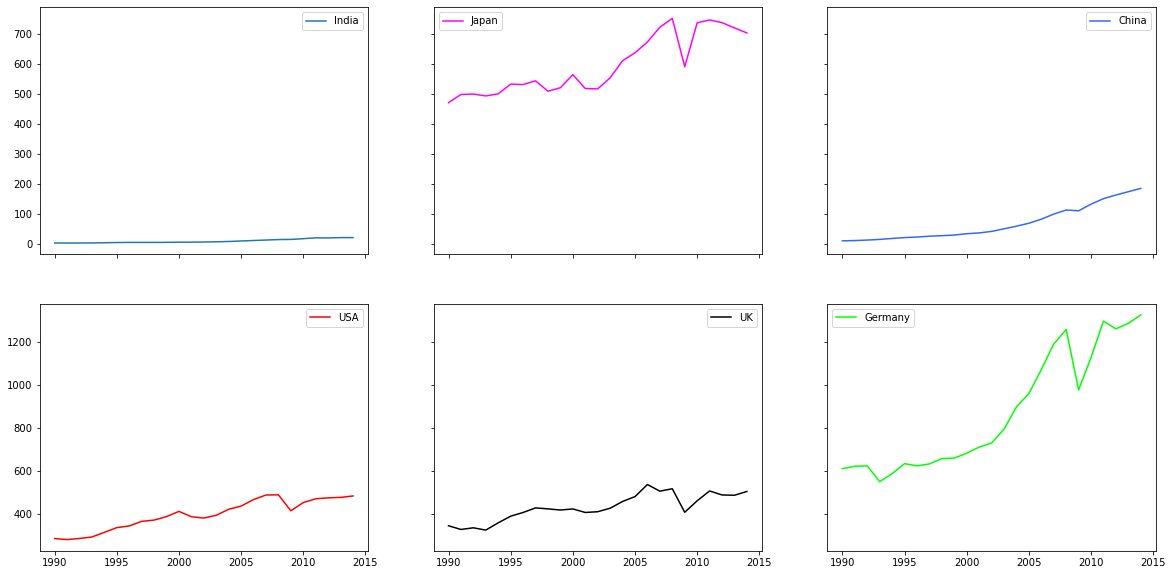

In [49]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10), sharex='col', sharey='row')

ax[0, 0].plot(dates, india_ind, label='India')
ax[0, 0].legend()

ax[0, 1].plot(dates, japan_ind, label='Japan', c='#ff00ff')
ax[0, 1].legend()

ax[0, 2].plot(dates, china_ind, label='China', c='#3366ff')
ax[0, 2].legend()

ax[1, 0].plot(dates, usa_ind, label='USA', c='red')
ax[1, 0].legend()

ax[1, 1].plot(dates, uk_ind, label='UK', c='black')
ax[1, 1].legend()

ax[1, 2].plot(dates, germany_ind, label='Germany', c='#00ff00')
ax[1, 2].legend()

In [50]:
#india_temp_ind = pd.concat([india_temp,pd.Series(india_ind)],axis=1,keys=['india_temp','india_ind'])
india_ind = pd.Series(india_ind)
india_ind = india_ind.rename({0:'Industrialisation index'})
india_temp_ind = pd.concat([india_temp,india_ind],axis=1,keys=['india_temp','industrialistion index'])
india_temp_ind.corr()

india_temp  \
                                                             dt   
india_temp             dt                              1.000000   
                       AverageTemperature              0.662429   
                       AverageTemperatureUncertainty   0.482627   
industrialistion index 0                               0.937407   

                                                                         \
                                                     AverageTemperature   
india_temp             dt                                      0.662429   
                       AverageTemperature                      1.000000   
                       AverageTemperatureUncertainty           0.445901   
industrialistion index 0                                       0.737565   

                                                                                    \
                                                     AverageTemperatureUncertainty   
india_temp             dt                                                 0.482627   
                       AverageTemperature                                 0.445901   
                       AverageTemperatureUncertainty                      1.000000   
industrialistion index 0                                                 -0.188931   

                                                     industrialistion index  
                                                                          0  
india_temp             dt                                          0.937407  
                       AverageTemperature                          0.737565  
                       AverageTemperatureUncertainty              -0.188931  
industrialistion index 0                                           1.000000

In [51]:
#there's a 0.937 correlation between time and industrialisation index
# and a 0.737 correlation between temperature and industrialisation index as we see above
# we can ignore temperature uncertainty

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2EDE77DF0>,
      dtype=object)

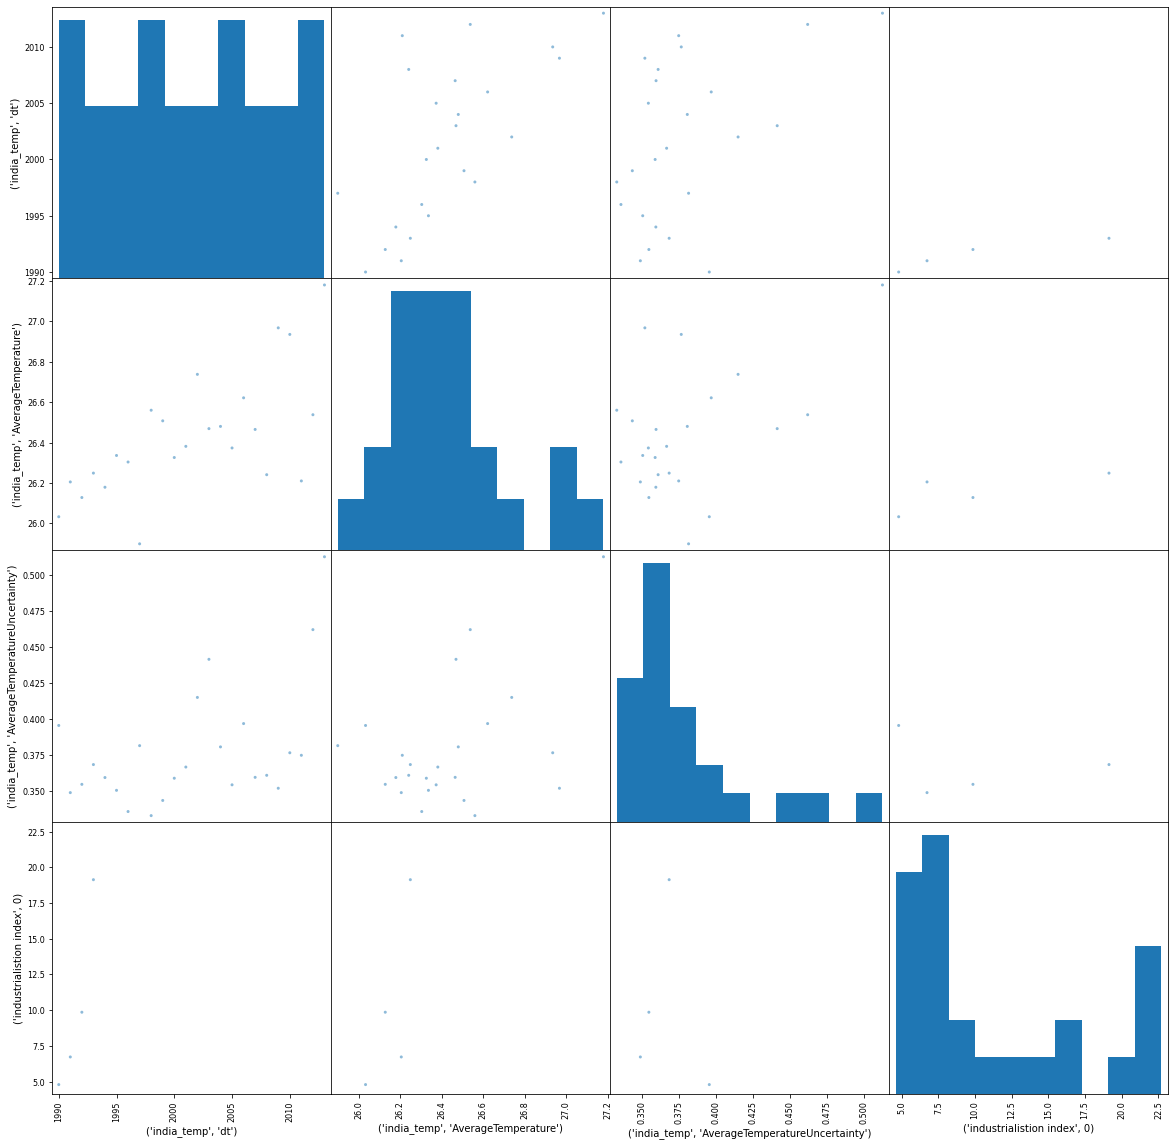

In [52]:
scatter_matrix(india_temp_ind,figsize=(20,20))

In [53]:
countries_temp_ind_p = dict()

india_temp_ind_p = ttest_rel(india_ind[:24],india_temp['AverageTemperature'])
china_temp_ind_p = ttest_rel(china_ind[:24],china_temp['AverageTemperature'])
germany_temp_ind_p = ttest_rel(germany_ind[:24],germany_temp['AverageTemperature'])
usa_temp_ind_p = ttest_rel(usa_ind[:24],usa_temp['AverageTemperature'])
uk_temp_ind_p = ttest_rel(uk_ind[:24],uk_temp['AverageTemperature'])
japan_temp_ind_p = ttest_rel(japan_ind[:24],japan_temp['AverageTemperature'])

countries_temp_ind_p['india'] = india_temp_ind_p
countries_temp_ind_p['japan'] = japan_temp_ind_p
countries_temp_ind_p['germany'] = germany_temp_ind_p
countries_temp_ind_p['uk'] = uk_temp_ind_p
countries_temp_ind_p['usa'] = usa_temp_ind_p
countries_temp_ind_p['china'] = china_temp_ind_p

countries_temp_ind_p = pd.DataFrame.from_dict(countries_temp_ind_p).rename({0:'statistic', 1:'p-value'})
countries_temp_ind_p

,india,japan,germany,uk,usa,china
statistic,-1.322700e+01,2.909017e+01,1.570701e+01,3.345659e+01,2.725243e+01,5.065414
p-value,3.092505e-12,1.206383e-19,8.682750e-14,5.195477e-21,5.196029e-19,0.000040


In [54]:
''' again we see all the p values being much smaller than the 5% significance, thus we can say with high certainty that there
is a positive correlation between industtrialisation and average tempearture for these countries'''

' again we see all the p values being much smaller than the 5% significance, thus we can say with high certainty that there\nis a positive correlation between industtrialisation and average tempearture for these countries'